<a href="https://colab.research.google.com/github/cmannnn/workhuman_data_analytic_canidate_exercise/blob/main/workhuman_data_analytic_canidate_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Key Fields**

*   visitId – this is the unique random identifier assigned by Google to each visit
*   fullVisitorId – this is the unique random identifier assigned by Google to each distinct user
*   hits.type – denotes the category of the hit (pageview, event, transaction, etc)
*   hits.page.pagePath – the URL pathname of the page where the hit occurred
hits.eventInfo. (columns AQ-AS) – this is the custom taxonomy for non-pageload interactions
*   trafficsource. (columns J-N) – these are UTM attributes about the referrer of the visit
*   device. (columns O-R) – these are technology attributes about the user
geoNetwork. (columns S-V) – these are location attributes about the user








# **Business KPIs**


*   Prospect conversion rate – the percent of first-time visitors with a transaction, excluding any returning customers
*   Channel revenue contribution – how much revenue is attributed to each acquisition channel
*   Gross margin – the percent of all e-commerce revenue – cost of goods sold out of total revenue








# **Business Questions**

*   What is the best way to segment Google organic search traffic, and why?
*   Which entry page(s) would be a good place to focus on optimizing and why?
*   What is the best way to measure how many transactions were completed and conversion rate, and why?
*   Which continent has the highest add-to-cart rate on mobile?
*   Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.

#Imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/da_google_analytics_sample.xlsx'

In [4]:
df = pd.read_excel(path, index_col = 'fullVisitorID')

In [5]:
cols_to_drop = ['trafficSource.campaignCode', 'hits.transaction.transactionCoupon', 'hits.eventInfo.eventValue', 'userId']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [6]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

# Current

In [7]:
df_grouped = df.groupby(df.index)

In [8]:
df_grouped.head(3)

,visitNumber,visitId,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,channelGrouping
fullVisitorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8467980000000000000,1,1489544305,1489544305,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Oceania,Australasia,Australia,bigpond.net.au,1,0,19,18,True,1.0,1.0,https://www.google.com.au/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
1061800000000000000,1,1489496466,1489496466,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Europe,Western Europe,France,eurorscg.fr,1,0,6,1,True,1.0,1.0,https://www.google.fr/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
2833520000000000000,1,1489517319,1489517319,2017-03-14,1,1,1.0,NaN,1.0,(not set),bing,organic,google merchandise,Internet Explorer,Windows,True,mobile,Asia,Western Asia,Israel,sfr.net,1,0,11,48,True,1.0,1.0,http://www.bing.com/search?q=google+merchandis...,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
975725000000000000,18,1489477788,1489477788,2017-03-14,1,1,1.0,NaN,NaN,(not set),google,organic,(not provided),Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,rr.com,1,0,0,49,True,1.0,1.0,NaN,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
4218860000000000000,1,1489485767,1489485767,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Europe,Southern Europe,Italy,reply.it,1,0,3,2,True,1.0,1.0,https://www.google.it/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349160000000000000,4,1489556428,1489556428,2017-03-14,1,205,179.0,4195.0,NaN,(not set),l.facebook.com,referral,NaN,Firefox,Windows,False,desktop,Asia,Southeast Asia,Indonesia,innovativeb2b.com,1,0,22,40,True,1.0,NaN,NaN,/home,shop.googlemerchandisestore.com,Home,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Social
9349160000000000000,4,1489556428,1489556428,2017-03-14,1,205,179.0,4195.0,NaN,(not set),l.facebook.com,referral,NaN,Firefox,Windows,False,desktop,Asia,Southeast Asia,Indonesia,innovativeb2b.com,2,156863,22,43,True,NaN,NaN,NaN,/google+redesign/apparel/mens,shop.googlemerchandisestore.com,Men's Apparel | Google Merchandise Store,/google+redesign/,/apparel/,/mens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Social
934916000000000

In [21]:
df['device.browser'].value_counts()

Chrome                      7590
Safari                       950
Firefox                      440
Edge                         300
Internet Explorer            153
Android Webview              128
Opera Mini                    78
Safari (in-app)               47
UC Browser                    13
Opera                          8
YaBrowser                      4
Amazon Silk                    3
Coc Coc                        2
Android Browser                2
Nokia Browser                  1
Mozilla Compatible Agent       1
Name: device.browser, dtype: int64

[]

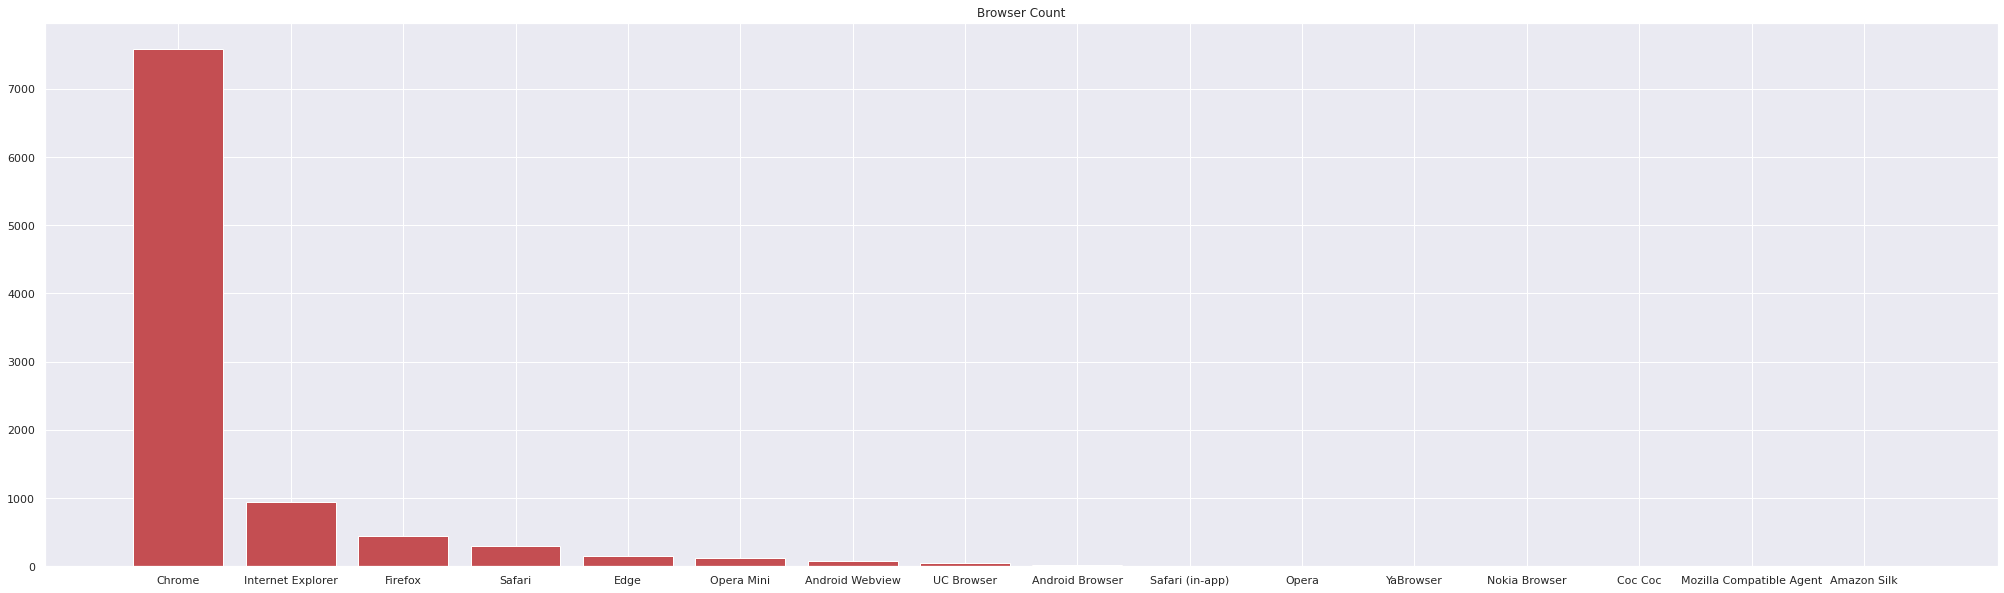

In [28]:
# browser count
ax, fig = plt.subplots(figsize = (35,10))
plt.bar(df['device.browser'].unique(), df['device.browser'].value_counts(), color = 'r')
plt.title('Browser Count %')
plt.plot()

In [45]:
df['device.deviceCategory'].value_counts()

desktop    7753
mobile     1784
tablet      183
Name: device.deviceCategory, dtype: int64

[]

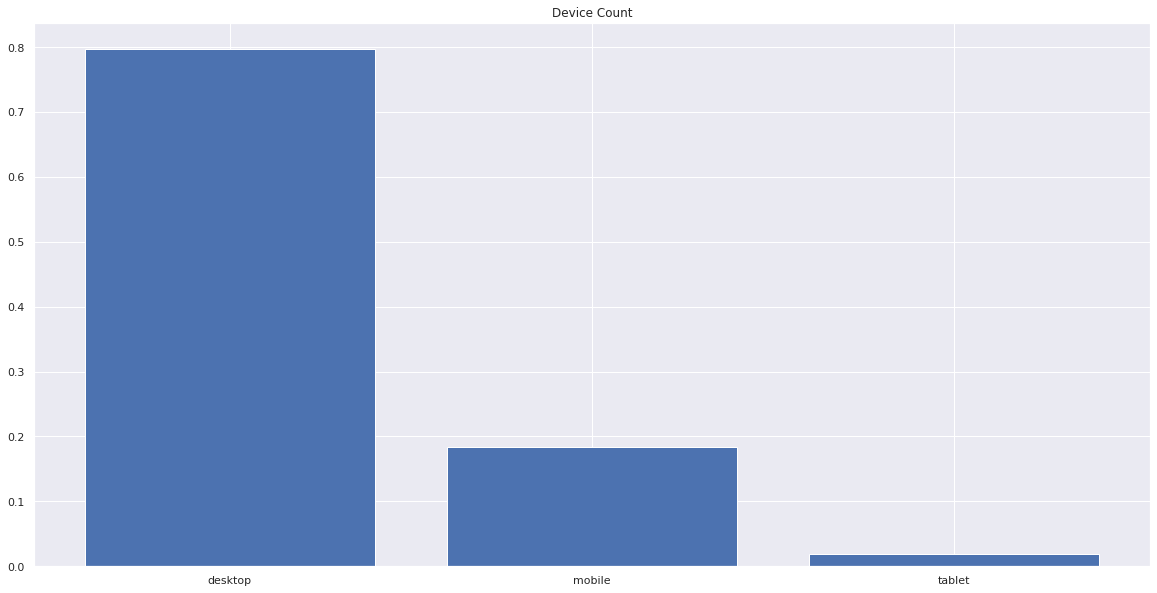

In [47]:
#device.deviceCategory	
ax, fig = plt.subplots(figsize = (20,10))
plt.bar(df['device.deviceCategory'].unique(), df['device.deviceCategory'].value_counts() / df['device.deviceCategory'].value_counts().sum(), color = 'b')
plt.title('Device Count %')
plt.plot()

[]

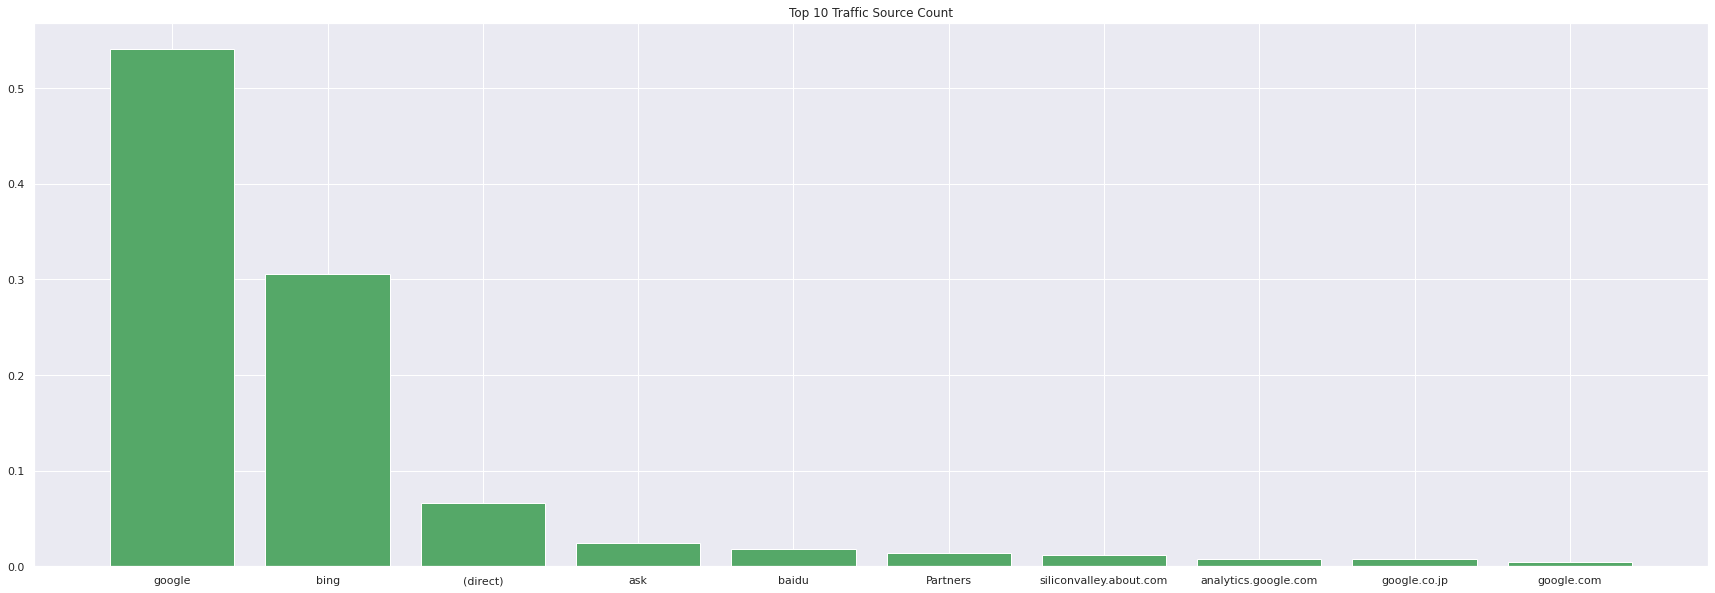

In [48]:
#device.deviceCategory	
ax, fig = plt.subplots(figsize = (30,10))
plt.bar(df['trafficSource.source'].unique()[0:10], df['trafficSource.source'].value_counts().iloc[:10] / df['trafficSource.source'].value_counts().iloc[:10].sum(), color = 'g')
plt.title('Top 10 Traffic Source Count %')
plt.plot()

In [17]:
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [53]:
df['device.isMobile'].value_counts()

False    7753
True     1967
Name: device.isMobile, dtype: int64

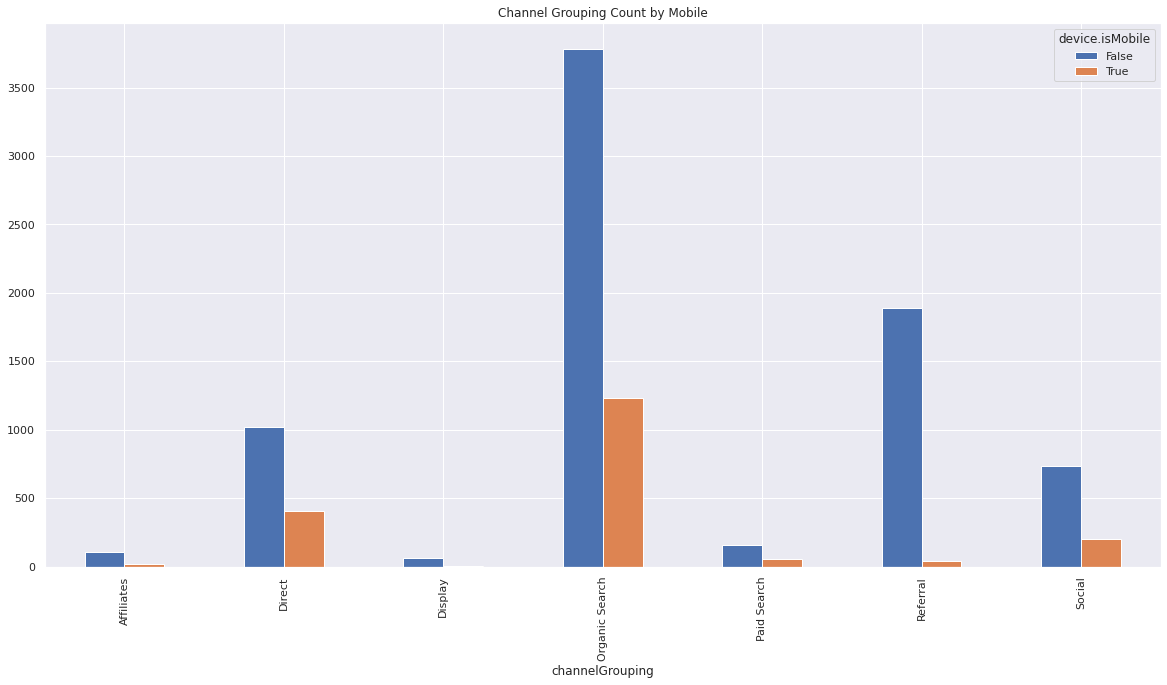

In [84]:
mobile_group = df.groupby(['channelGrouping', 'device.isMobile'])
#print(mobile_group)
mobile_group_count = mobile_group['channelGrouping'].count()
mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping Count by Mobile')

[]

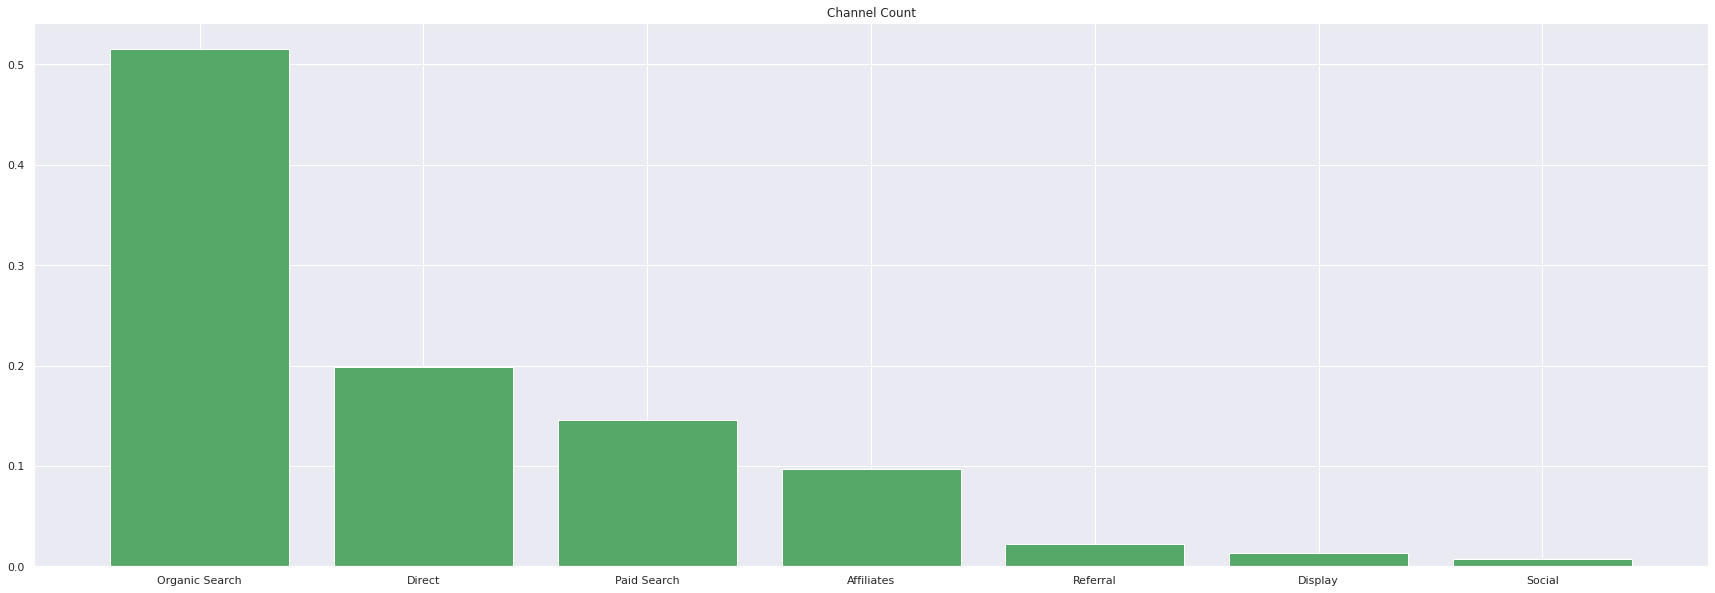

In [49]:
ax, fig = plt.subplots(figsize = (30,10))
plt.bar(df['channelGrouping'].unique(), df['channelGrouping'].value_counts() / df['channelGrouping'].value_counts().sum(), color = 'g')
plt.title('Channel Count %')
plt.plot()

In [16]:
df['hits.type'].value_counts()

PAGE     8550
EVENT    1170
Name: hits.type, dtype: int64

In [ ]:
df['hits.transaction.transactionRevenue'].value_counts()

In [20]:
df['fullVisitorID'].value_counts()

9349160000000000000    205
6957250000000000000    179
119870000000000000      86
2838750000000000000     70
6481830000000000000     57
                      ... 
490773000000000000       1
7359220000000000000      1
715918000000000000       1
2492940000000000000      1
511969000000000000       1
Name: fullVisitorID, Length: 2154, dtype: int64

In [ ]:
ds['visitNumber'].value_counts()

In [9]:
ds.dtypes

visitNumber                                       int64
visitStartTime                                    int64
date                                     datetime64[ns]
totals.visits                                     int64
totals.hits                                       int64
totals.pageviews                                float64
totals.timeOnSite                               float64
totals.newVisits                                float64
trafficSource.campaign                           object
trafficSource.source                             object
trafficSource.medium                             object
trafficSource.keyword                            object
device.browser                                   object
device.operatingSystem                           object
device.isMobile                                    bool
device.deviceCategory                            object
geoNetwork.continent                             object
geoNetwork.subContinent                         

In [11]:
ds.describe()

,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isEntrance,hits.isExit,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,fullVisitorID
count,9720.000000,9.720000e+03,9720.0,9720.000000,9718.000000,8533.000000,6746.0,9720.000000,9.720000e+03,9720.000000,9720.000000,2337.0,2337.0,4.000000e+01,3.200000e+01,4.000000e+01,9720.000000,9720.000000,95.0,95.000000,95.000000,9.720000e+03
mean,2.554218,1.489520e+09,1.0,21.861934,17.791727,853.666237,1.0,11.446399,4.066472e+05,12.038374,29.548765,1.0,1.0,9.800775e+07,1.435594e+07,1.478125e+07,0.504733,1.028807,1.0,11470.368421,684.947368,4.574299e+18
std,8.921266,2.279499e+04,0.0,38.012443,31.022326,1854.433413,0.0,22.831471,1.215049e+06,6.331991,17.318717,0.0,0.0,9.170047e+07,9.682333e+06,9.080651e+06,1.195207,0.213240,0.0,40755.534447,4788.293425,3.141963e+18
min,1.000000,1.489475e+09,1.0,1.000000,1.000000,2.000000,1.0,1.000000,0.000000e+00,0.000000,0.000000,1.0,1.0,5.590000e+06,2.970000e+06,7.500000e+06,0.000000,1.000000,1.0,1194.000000,1.000000,3.041320e+15
25%,1.000000,1.489504e+09,1.0,3.000000,3.000000,105.000000,1.0,2.000000,3.724500e+03,8.000000,15.000000,1.0,1.0,2.398750e+07,7.872500e+06,1.050000e+07,0.000000,1.000000,1.0,2616.500000,57.500000,1.519302e+18
50%,1.000000,1.489520e+09,1.0,10.000000,9.000000,316.000000,1.0,4.000000,7.619000e+04,12.000000,29.000000,1.0,1.0,9.024000e+07,1.288000e+07,1.150000e+07,0.000000,1.000000,1.0,3535.000000,119.000000,4.594700e+18
75%,2.000000,1.489536e+09,1.0,23.000000,18.000000,758.000000,1.0,11.000000,2.914350e+05,17.000000,45.000000,1.0,1.0,1.258500e+08,1.707250e+07,1.450000e+07,0.000000,1.000000,1.0,6270.000000,156.000000,7.261580e+18
max,265.000000,1.489561e+09,1.0,205.000000,179.000000,12136.000000,1.0,205.000000,1.213579e+07,23.000000,59.000000,1.0,1.0,4.877000e+08,5.162000e+07,5.573000e+07,6.000000,3.000000,1.0,381337.000000,46713.000000,9.997460e+18
